In [180]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

import wrangle as w


import env
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [246]:
df1 = w.get_df()

In [290]:
train, validate, test  = w.split_clean_zillow()

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.
21610 outliers removed from tax.

Total of 54860 outliers removed.


In [284]:
train = train.drop(columns=["fips", "orange", "ventura"])

In [287]:
df = train

In [70]:
df1 = df1.sample(1000)

In [227]:
x_train_scaled, x_validate_scaled, x_test_scaled, y_train_scaled, y_validate_scaled, y_test_scaled = w.split_scale(df1)

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from value.
16 outliers removed from year.
21610 outliers removed from tax.
0 outliers removed from bathroom_full.
0 outliers removed from orange.
0 outliers removed from ventura.

Total of 54860 outliers removed.


In [71]:
train, validate, test = w.split_scale1(df1)
# x = area
# y = tax

0 outliers removed from bedroom.
6 outliers removed from bathroom.
4 outliers removed from area.
12 outliers removed from value.
0 outliers removed from year.
7 outliers removed from tax.
0 outliers removed from bathroom_full.
0 outliers removed from orange.
0 outliers removed from ventura.

Total of 29 outliers removed.


In [291]:
df = train[["area", "value"]]

KeyError: "['value'] not in index"

In [289]:
df['tax_baseline'] = df['tax'].mean()

In [262]:
# generate parameters, i.e. create model
lr = LinearRegression()
ols_model = lr.fit(df[['area']], df.tax)

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df[['area']])


In [263]:
df

,area,tax,tax_baseline,yhat
95764,1336.0,1106.58,4816.767039,3662.802938
26088,1882.0,2679.76,4816.767039,5059.419737
1873299,884.0,2554.82,4816.767039,2506.629325
285118,833.0,3490.04,4816.767039,2376.176108
1900458,2840.0,6415.56,4816.767039,7509.893899
...,...,...,...,...
1842433,928.0,4877.69,4816.767039,2619.177199
1107106,3112.0,4650.96,4816.767039,8205.644391
1984259,1064.0,4187.11,4816.767039,2967.052446
614562,2865.0,4167.64,4816.767039,7573.841554


In [264]:
# compute residuals
df['residual'] = df['yhat'] - df['tax']
df['residual_baseline'] = df['tax_baseline'] - df['tax']

In [265]:
# square each residual value
df['residual_sq'] = df.residual ** 2

df['residual_baseline_sq'] = df.residual_baseline ** 2

In [266]:
# SSE
SSE = sum(df['residual_sq'])
SSE_baseline = sum(df['residual_baseline_sq'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  9773143873211.836
SSE - baseline =  14559947137451.92


In [267]:
# MSE
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  7810860.455323252
MSE baseline =  11636553.887152126


In [268]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  2794.7916658175527
RMSE baseline =  3411.239347678806


# SKLEARN

In [269]:
from sklearn.metrics import mean_squared_error
SSE2 = mean_squared_error(df.tax, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.tax, df.tax_baseline)*len(df)

print(f'''SSE manual == SSE sklearn: {SSE, SSE2}
SSE manual - baseline == SSE sklearn - baseline: {SSE_baseline, SSE2_baseline}''')

SSE manual == SSE sklearn: (9773143873211.836, 9773143873211.926)
SSE manual - baseline == SSE sklearn - baseline: (14559947137451.92, 14559947137451.861)


In [270]:
MSE2 = mean_squared_error(df.tax, df.yhat)

MSE2_baseline = mean_squared_error(df.tax, df.tax_baseline)


print(f"MSE manual == MSE sklearn: {MSE, MSE2}") 
print(f"MSE manual - baseline == MSE sklearn - baseline: {MSE_baseline, MSE2_baseline}") 

MSE manual == MSE sklearn: (7810860.455323252, 7810860.455323324)
MSE manual - baseline == MSE sklearn - baseline: (11636553.887152126, 11636553.88715208)


In [271]:
RMSE2 = sqrt(mean_squared_error(df.tax, df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.tax, df.tax_baseline))

print(f"RMSE manual == RMSE skearn:  {RMSE, RMSE2}") 
print(f"RMSE manual - baseline == RMSE skearn - baseline: {RMSE_baseline,  RMSE2_baseline} ")


RMSE manual == RMSE skearn:  (2794.7916658175527, 2794.7916658175654)
RMSE manual - baseline == RMSE skearn - baseline: (3411.239347678806, 3411.2393476787993) 


In [272]:
SSE2

9773143873211.926

In [273]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric   model_error
0    SSE  9.773144e+12
1    MSE  7.810860e+06
2   RMSE  2.794792e+03
          metric   model_error
0   SSE_baseline  1.455995e+13
1   MSE_baseline  1.163655e+07
2  RMSE_baseline  3.411239e+03


3. Plot the residuals for the linear regression model that you made.

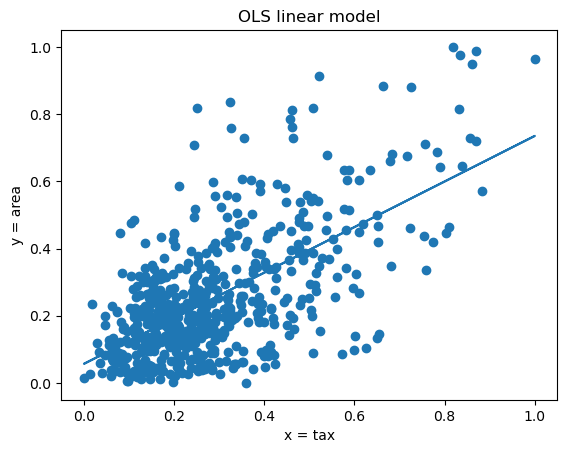

In [85]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(df.area, df.tax)

#lineplot is my regression line
plt.plot(df.area, df.yhat)


plt.xlabel('x = tax')
plt.ylabel('y = area')
plt.title('OLS linear model')
plt.show()

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [177]:
def compare_sse(df, x, y):
    # create baseline
    df['yhat_baseline'] = df[y].mean()
    
    # creating simplae model 
    lr = LinearRegression()
    ols_model = lr.fit(df[[x]], df[y])
    df['yhat'] = ols_model.predict(df[[x]])
    
    # compute SSE
    SSE = mean_squared_error(df[y], df.yhat)*len(df)
    SSE_baseline = mean_squared_error(df[y], df.yhat_baseline)*len(df)
    
    # compute MSE
    MSE = mean_squared_error(df[y], df.yhat)
    MSE_baseline = mean_squared_error(df[y], df.yhat_baseline)
    
    # compute RMSE
    RMSE = sqrt(mean_squared_error(df[y], df.yhat))
    RMSE_baseline = sqrt(mean_squared_error(df[y], df.yhat_baseline))
    
    # compute ESS
    ESS = sum((df.yhat - df[y].mean())**2)
    

    
    
    df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE', 'SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

    df_eval['model_error'] = np.array([SSE, MSE, RMSE, SSE_baseline, MSE_baseline, RMSE_baseline])

    df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
    
    return pd.DataFrame(df_eval)


In [277]:
compare_sse(train, "area", "tax")

,metric,model_error,error_delta
0,SSE,9.773144e+12,-4.786803e+12
1,MSE,7.810860e+06,-3.825693e+06
2,RMSE,2.794792e+03,-6.164477e+02
3,SSE_baseline,1.455995e+13,NaN
4,MSE_baseline,1.163655e+07,NaN
5,RMSE_baseline,3.411239e+03,NaN


In [223]:
def compare_models(y, yhat, y_baseline):
    # Calculate the sum of squared errors for the model and the baseline
    model_sse = np.sum((y - yhat) ** 2)
    baseline_sse = np.sum((y - y_baseline) ** 2)

    # Compare the SSE values and output the result
    if model_sse < baseline_sse:
        print("Your model performs better than the baseline model.")
    elif model_sse > baseline_sse:
        print("Your model does not perform better than the baseline model.")
    else:
        print("Your model performs equally to the baseline model.")

In [276]:
compare_models(df.tax, df.yhat, df.tax_baseline)

Your model performs better than the baseline model.


In [208]:
def plot_residuals(y, yhat):
    # Calculate residuals
    residuals = y - yhat

    # Create a scatter plot of residuals
    plt.scatter(yhat, residuals)
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

    # Set plot labels and title
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    # Show the plot
    plt.show()

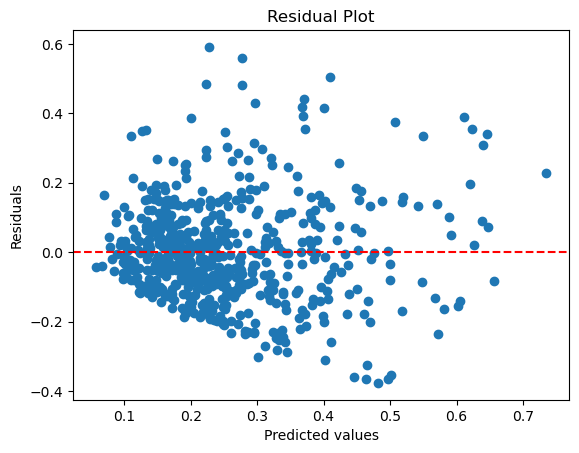

In [209]:
plot_residuals(df.tax, df.yhat)

In [214]:
import numpy as np

def regression_errors(y, yhat):
    # Calculate the squared errors
    squared_errors = (y - yhat) ** 2

    # Calculate the sum of squared errors (SSE)
    sse = np.sum(squared_errors)

    # Calculate the explained sum of squares (ESS)
    ess = np.sum((yhat - np.mean(y)) ** 2)

    # Calculate the total sum of squares (TSS)
    tss = np.sum((y - np.mean(y)) ** 2)

    # Calculate the mean squared error (MSE)
    mse = np.mean(squared_errors)

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    
    print("Sum of Squared Errors (SSE):", sse)
    print("Explained Sum of Squares (ESS):", ess)
    print("Total Sum of Squares (TSS):", tss)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    return sse, ess, tss, mse, rmse


In [275]:
regression_errors(df.tax, df.yhat)

Sum of Squared Errors (SSE): 9773143873211.926
Explained Sum of Squares (ESS): 4786803264240.05
Total Sum of Squares (TSS): 14559947137451.861
Mean Squared Error (MSE): 7810860.455323252
Root Mean Squared Error (RMSE): 2794.7916658175527


(9773143873211.926,
 4786803264240.05,
 14559947137451.861,
 7810860.455323252,
 2794.7916658175527)

In [216]:
def baseline_mean_errors(y):
    # Calculate the mean of y
    y_mean = np.mean(y)

    # Calculate the squared errors
    squared_errors = (y - y_mean) ** 2

    # Calculate the sum of squared errors (SSE)
    sse = np.sum(squared_errors)

    # Calculate the mean squared error (MSE)
    mse = np.mean(squared_errors)

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(mse)

    return sse, mse, rmse

In [274]:
baseline_mean_errors(df.tax)

(14559947137451.861, 11636553.887152126, 3411.239347678806)

In [220]:
def better_than_baseline(y, yhat):
    # Calculate the mean of y
    y_mean = np.mean(y)

    # Calculate the sum of squared errors for the model and the baseline
    model_sse = np.sum((y - yhat) ** 2)
    baseline_sse = np.sum((y - y_mean) ** 2)

    # Check if the model's SSE is lower than the baseline's SSE
    if model_sse < baseline_sse:
        return True
    else:
        return False

In [222]:
df1

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
274688,274688,3.0,1.0,1270.0,84334.0,1930.0,1155.60,6037.0
1530144,1530144,4.0,2.0,2027.0,338023.0,1956.0,4264.07,6037.0
394467,394467,4.0,3.0,1536.0,214451.0,1997.0,2765.16,6037.0
1661817,1661817,3.0,2.0,1248.0,317423.0,1960.0,3935.14,6037.0
51313,51313,4.0,3.0,2003.0,80842.0,1954.0,2573.80,6059.0
...,...,...,...,...,...,...,...,...
1513411,1513411,2.0,1.0,1115.0,309474.0,1951.0,3756.71,6037.0
1090779,1090779,3.0,3.0,2078.0,890058.0,1969.0,10849.75,6037.0
698534,698534,3.0,1.5,1283.0,181498.0,1955.0,2259.18,6059.0
1406919,1406919,4.0,2.0,1954.0,67878.0,1955.0,1067.06,6037.0


In [278]:
better_than_baseline(df.tax, df.yhat)

True

In [281]:
r2_score(df.tax, df.yhat)

0.32876515409366214